In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
avacado_df = pd.read_csv('avocado.csv')

In [3]:
avacado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
avacado_df.head()
avacado_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
avacado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
avacado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
avacado_df = avacado_df.sort_values('Date')


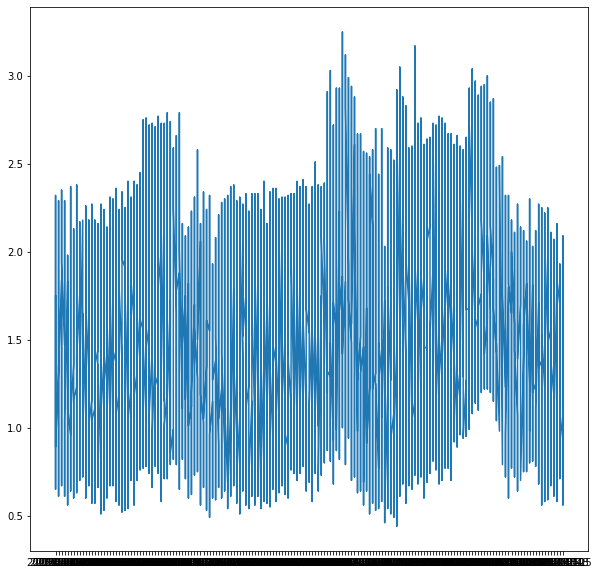

In [8]:
plt.figure(figsize = (10,10))
plt.plot(avacado_df['Date'], avacado_df['AveragePrice'])

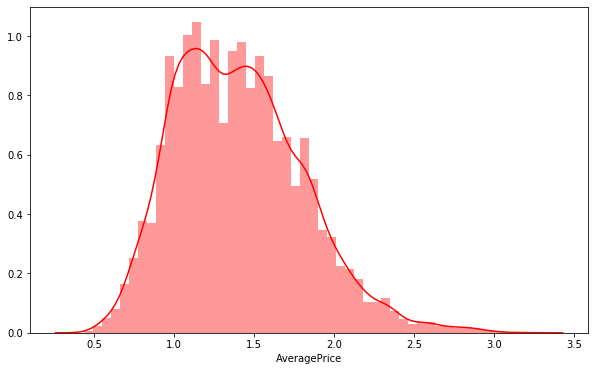

In [10]:
# Average Size Distribution
plt.figure(figsize = (10,6))
sns.distplot(avacado_df['AveragePrice'], color = 'r')

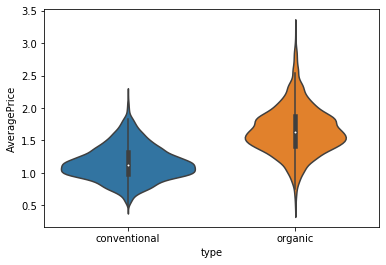

In [2]:

import seaborn as sns
import pandas as pd
avacado_df = pd.read_csv('avocado.csv')
sns.violinplot(y = 'AveragePrice', x = 'type', data = avacado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

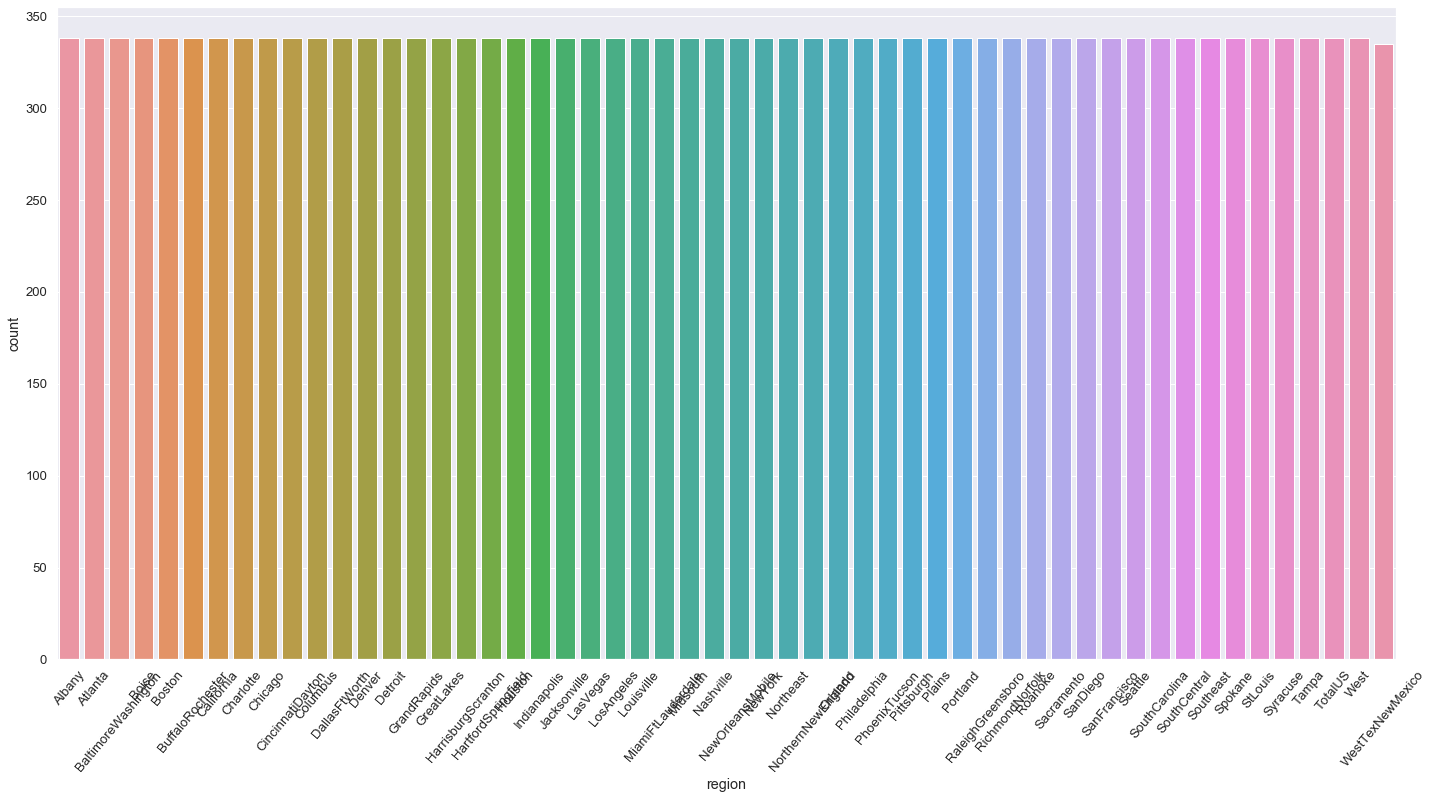

In [4]:
# Bar Chart to Know about number of regions(USA)
sns.set(font_scale=1.2)
import matplotlib.pyplot as plt
plt.figure(figsize=[24,12])
sns.countplot(x = 'region', data = avacado_df)
plt.xticks(rotation = 50)

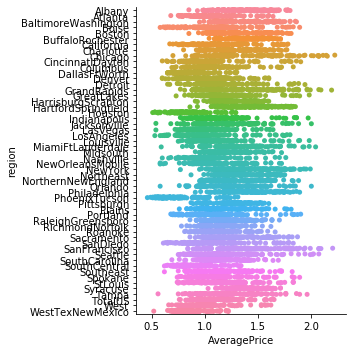

In [5]:
# Prices vs Regions Plot
import seaborn as sns
import pandas as pd
avacado_df = pd.read_csv('avocado.csv')
conventional = sns.catplot('AveragePrice', 'region', data = avacado_df[avacado_df['type']=='conventional']) 
hue = 'year',
height = 5

In [6]:
avacado_prophet_df = avacado_df[['Date', 'AveragePrice']]

In [7]:
avacado_prophet_df

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [8]:
avacado_prophet_df = avacado_prophet_df.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [9]:
avacado_prophet_df

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [11]:
from fbprophet import Prophet
s = Prophet()
s.fit(avacado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# Forecatsing Process
future = s.make_future_dataframe(periods=365)
forecast = s.predict(future)

In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499585,0.895324,1.883918,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
1,2015-01-04,1.499585,0.903024,1.859055,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
2,2015-01-04,1.499585,0.924798,1.887429,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
3,2015-01-04,1.499585,0.899701,1.845963,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
4,2015-01-04,1.499585,0.888840,1.869833,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.156579,0.478913,1.545454,0.938299,1.355405,-0.085825,-0.085825,-0.085825,-0.085825,-0.085825,-0.085825,0.0,0.0,0.0,1.070754
18610,2019-03-22,1.155832,0.547624,1.657974,0.936490,1.355809,-0.084051,-0.084051,-0.084051,-0.084051,-0.084051,-0.084051,0.0,0.0,0.0,1.071781
18611,2019-03-23,1.155084,0.516286,1.596201,0.934711,1.356250,-0.082002,-0.082002,-0.082002,-0.082002,-0.082002,-0.082002,0.0,0.0,0.0,1.073083
18612,2019-03-24,1.154337,0.563084,1.629005,0.932932,1.356741,-0.079697,-0.079697,-0.079697,-0.079697,-0.079697,-0.079697,0.0,0.0,0.0,1.074640


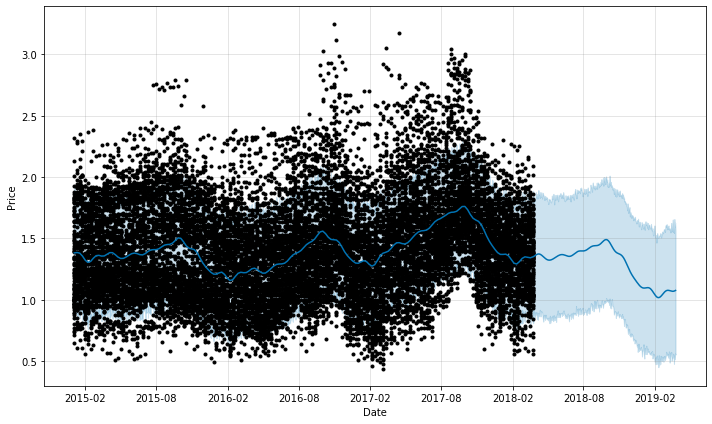

In [14]:
figure = s.plot(forecast, xlabel = 'Date', ylabel = 'Price')

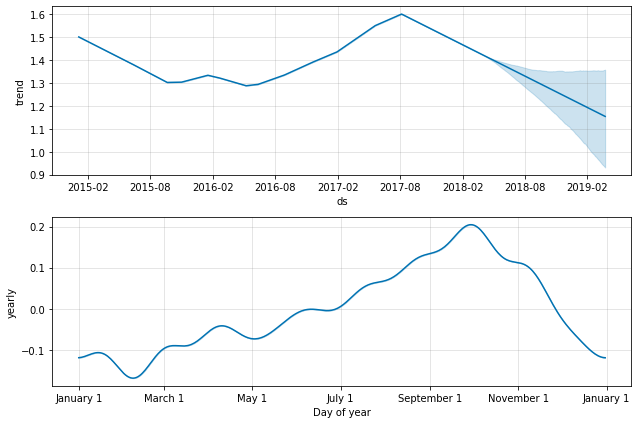

In [15]:
figure1 = s.plot_components(forecast)

In [16]:
avacado_df = pd.read_csv('avocado.csv')

In [17]:
avacado_df_sample = avacado_df[avacado_df['region']=='LosAngeles']

In [19]:
avacado_df_sample = avacado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


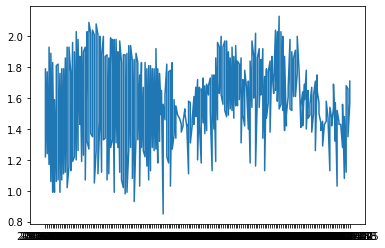

In [21]:
import matplotlib.pyplot as plt
plt.plot(avacado_df_sample['Date'], avacado_df_sample['AveragePrice'])

In [25]:
avacado_df_sample = avacado_df[avacado_df['region']=='']
avacado_df_sample = avacado_df_sample.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [26]:
avacado_df_sample

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,7,2018-02-04,1.52,4124.96,118.38,420.36,0.00,3586.22,3586.22,0.00,0.0,organic,2018,Albany
17609,8,2018-01-28,1.32,6987.56,433.66,374.96,0.00,6178.94,6178.94,0.00,0.0,organic,2018,Albany
17610,9,2018-01-21,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.0,organic,2018,Albany
17611,10,2018-01-14,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.0,organic,2018,Albany


In [27]:
from fbprophet import Prophet
p = Prophet()
p.fit(avacado_df_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future = s.make_future_dataframe(periods=365)
forecast = s.predict(future)

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499585,0.913449,1.881499,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
1,2015-01-04,1.499585,0.874709,1.854036,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
2,2015-01-04,1.499585,0.913637,1.912236,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
3,2015-01-04,1.499585,0.904580,1.899877,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
4,2015-01-04,1.499585,0.920508,1.878588,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.156579,0.569064,1.598876,0.954120,1.374114,-0.085825,-0.085825,-0.085825,-0.085825,-0.085825,-0.085825,0.0,0.0,0.0,1.070754
18610,2019-03-22,1.155832,0.515871,1.586079,0.952437,1.374490,-0.084051,-0.084051,-0.084051,-0.084051,-0.084051,-0.084051,0.0,0.0,0.0,1.071781
18611,2019-03-23,1.155084,0.548521,1.601353,0.951053,1.374879,-0.082002,-0.082002,-0.082002,-0.082002,-0.082002,-0.082002,0.0,0.0,0.0,1.073083
18612,2019-03-24,1.154337,0.555882,1.600559,0.949416,1.375269,-0.079697,-0.079697,-0.079697,-0.079697,-0.079697,-0.079697,0.0,0.0,0.0,1.074640


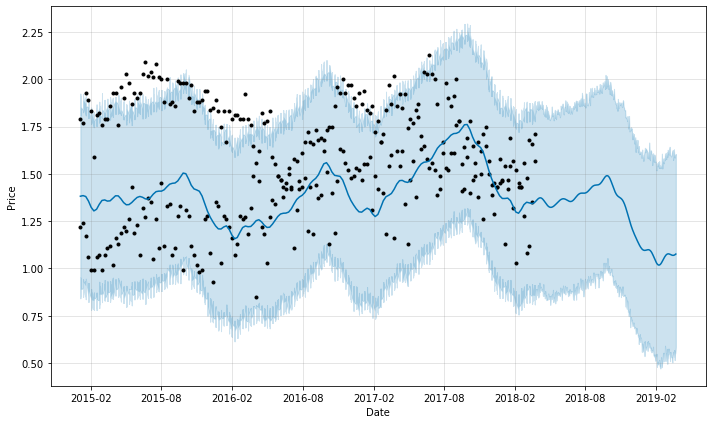

In [31]:
figure = p.plot(forecast, xlabel = 'Date', ylabel = 'Price')

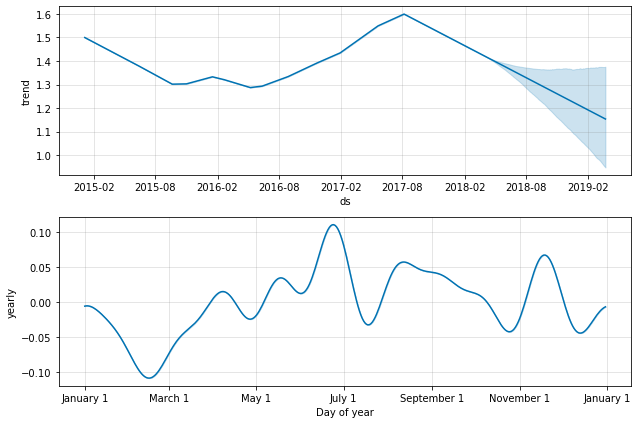

In [32]:
figurea = p.plot_components(forecast)